### Arquivo para teste e avaliação de clusters

In [ ]:
#imports
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('./clusters')

from clusters.clusters import load_embeddings, run_kmeans, run_agnes,run_pam, run_clarans, save_clusters
from clusters.utils_clusters import evaluate_silhouette, evaluate_dunn

In [ ]:
def test_all_methods(embeddings, methods, k_values, output_path, dataset_name):
    os.makedirs(output_path, exist_ok=True)
    
    for method in methods:
        results = []
        for k in k_values:
            
            clusters_ids, model = method(embeddings, k)

            save_path = f"{output_path}/{dataset_name}_clusters_{method.__name__}_k{k}.csv"
            save_clusters(clusters_ids, save_path)
            
            silhouette = evaluate_silhouette(embeddings, clusters_ids)
            dunn = evaluate_dunn(embeddings, clusters_ids)
            # connec = evaluate_connectivity(embeddings, clusters_ids)
            
            results.append({
                        "Method" : method.__name__,
                        "k" : k, 
                        "Silhouette":silhouette, 
                        "Dunn":dunn,
                        # "Connectivity":connec,
            })
            
    df = pd.DataFrame(results)
    results_csv_path = os.path.join(output_path, f"{dataset_name}_{method.__name__}_results_test_clusters.csv")
    df.to_csv(results_csv_path, index=False)
    print(f"Results saved to {results_csv_path}")

In [ ]:
dataset = 'Beauty'

In [ ]:
# parametros de teste
embedding_path = f'../data_preprocessing/{dataset}/{dataset}-similarity-values-thenlper_gte-large.pt'
output_path = 'clusters/{dataset}'
os.makedirs(output_path, exist_ok=True)
embeddings = load_embeddings(embedding_path) #carregando embeddings

In [ ]:
#teste dos clusters

methods = [run_kmeans, run_agnes, run_pam, run_clarans]
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

test_all_methods(embeddings, methods, k_values, output_path, dataset)

In [4]:
# kmeans para diferentes k
scores = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9]
inertias= []
for k in k_values:
    # run KMeans
    cluster_ids, kmeans_model = run_kmeans(embeddings, n_clusters=k)

    # slvar clusters
    output_path = f'clusters/Beauty/kmeansk{k}_clusters.csv'
    save_clusters(cluster_ids, output_path)

    #inércia do modelo kmeans
    inertias.append({'k': k, 'inertia': kmeans_model.inertia_})
    print(f'Inertia (k = {k}): {kmeans_model.inertia_:.4f}')
    
    # Silhouette
    score = evaluate_silhouette(embeddings, cluster_ids)
    scores.append({'k': k, 'silhouette_score': score})
    print(f'Silhouette score (k = {k}): {score:.4f}')

# Salvar os resultados ddo coeficiente de silhueta em um arquivo CSV
df_scores = pd.DataFrame(scores)
df_scores.to_csv('clusters/Beauty/kmeans_silhouette_scores.csv', index=False)

# Salvar os resultados da inercia em um arquivo CSV
df_inertias = pd.DataFrame(inertias)
df_inertias.to_csv('clusters/Beauty/kmeans_inertia_scores.csv', index=False)

Clusters salvos em clusters/Beauty/kmeansk2_clusters.csv
Inertia (k = 2): 11895.3555
Silhouette score (k = 2): 0.5112
Clusters salvos em clusters/Beauty/kmeansk3_clusters.csv
Inertia (k = 3): 7085.9824
Silhouette score (k = 3): 0.4448
Clusters salvos em clusters/Beauty/kmeansk4_clusters.csv
Inertia (k = 4): 4879.0444
Silhouette score (k = 4): 0.4255
Clusters salvos em clusters/Beauty/kmeansk5_clusters.csv
Inertia (k = 5): 3601.4653
Silhouette score (k = 5): 0.4172
Clusters salvos em clusters/Beauty/kmeansk6_clusters.csv
Inertia (k = 6): 2877.5713
Silhouette score (k = 6): 0.3911
Clusters salvos em clusters/Beauty/kmeansk7_clusters.csv
Inertia (k = 7): 2444.5938
Silhouette score (k = 7): 0.3641
Clusters salvos em clusters/Beauty/kmeansk8_clusters.csv
Inertia (k = 8): 2154.7024
Silhouette score (k = 8): 0.3403
Clusters salvos em clusters/Beauty/kmeansk9_clusters.csv
Inertia (k = 9): 1968.7034
Silhouette score (k = 9): 0.3174


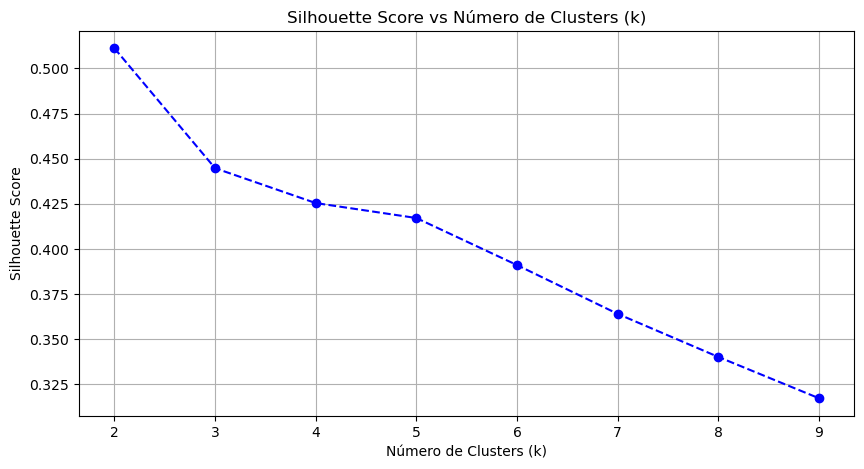

In [5]:
#plotando grafico silhouette score X k

df_scores = pd.read_csv('clusters/Beauty/kmeans_silhouette_scores.csv')

plt.figure(figsize=(10, 5))
plt.plot(df_scores['k'], df_scores['silhouette_score'], marker='o', linestyle='--', color='blue')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

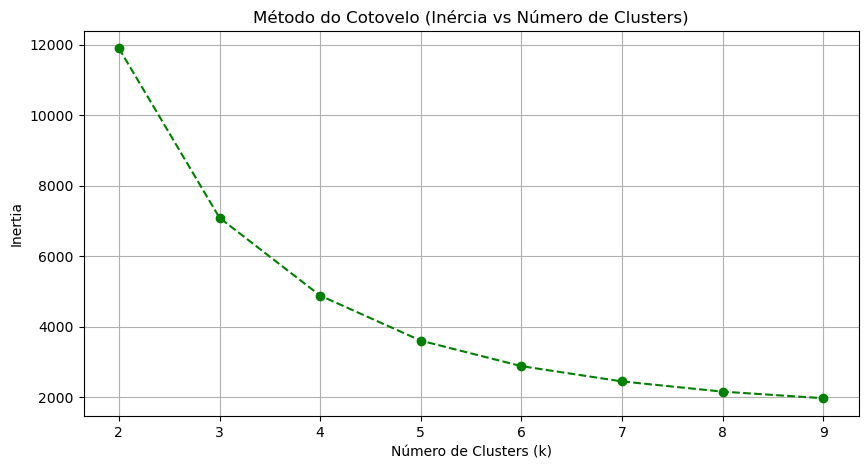

In [29]:
# método de cotovelo (grafico inertia X k)
df_scores = pd.read_csv('clusters/Beauty/kmeans_inertia_scores.csv')

plt.figure(figsize=(10, 5))
plt.plot(df_inertias['k'], df_inertias['inertia'], marker='o', linestyle='--', color='green')
plt.title('Método do Cotovelo (Inércia vs Número de Clusters)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()